<a href="https://colab.research.google.com/github/SarinaMashreghi/ML-notebooks/blob/main/tensorflow_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification with neural network

## Creating data

In [ ]:
from sklearn.datasets import make_circles 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
 n_samples = 1000

 X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)
 X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
circles = pd.DataFrame({"x0": X[:, 0], "x1": X[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


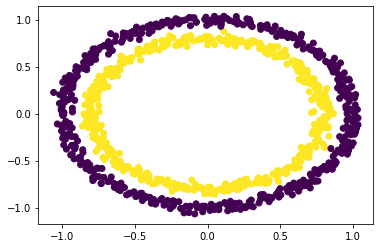

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
model = tf.keras.Sequential([
    # tf.keras.Input(shape=(2,),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def plot_decision_boundry(model, x, y):
  x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
  y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
  xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacks 2D arrays together 
  y_pred = model.predict(x_in)
  y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.RdYlBu, c=y)
  plt. xlim(xx.min(), xx.max())
  plt. ylim(yy.min(), yy.max())

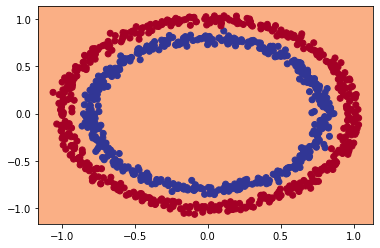

In [ ]:
plot_decision_boundry(model, X, y)

In [ ]:
model.evaluate(X, y)

32/32 [==============================] - 0s 894us/step - loss: 0.7048 - accuracy: 0.5000


[0.7048447728157043, 0.5]

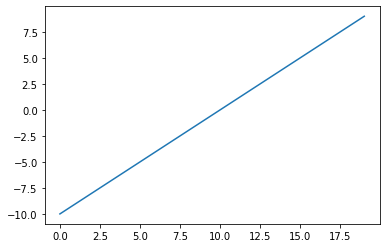

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

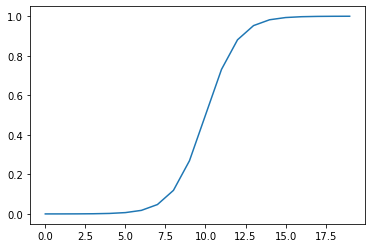

In [ ]:
plt.plot(tf.sigmoid(A))

##Separating data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
history = model.fit(X_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.4866
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4866
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.4940
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.4896
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5030
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5552
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5731
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5836
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5925
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6045
Epoch 11/

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8758


[0.3149942457675934, 0.8757575750350952]

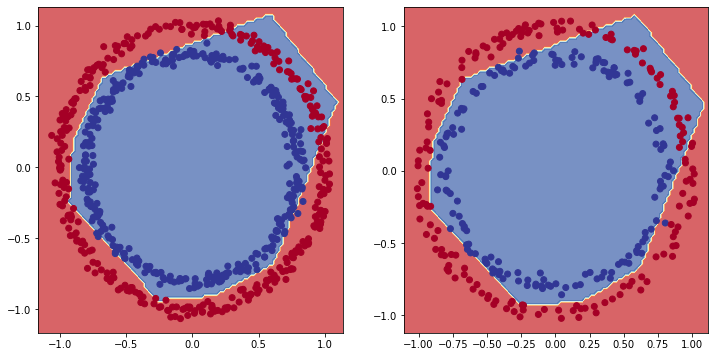

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundry(model, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundry(model, X_test, y_test)

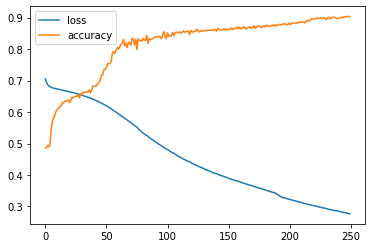

In [ ]:
pd.DataFrame(history.history).plot()


##Callback

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="softmax")
])

model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

h_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5134 - lr: 1.0000e-04
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5134 - lr: 1.1220e-04
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5134 - lr: 1.2589e-04
Epoch 4/100
21/21 [==============================] - 0s 988us/step - loss: 0.6918 - accuracy: 0.5134 - lr: 1.4125e-04
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5134 - lr: 1.5849e-04
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5134 - lr: 1.7783e-04
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5134 - lr: 1.9953e-04
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5134 - lr: 2.2387e-04
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - los

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4881 - lr: 1.0000e-04
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4866 - lr: 1.1220e-04
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4851 - lr: 1.2589e-04
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4896 - lr: 1.4125e-04
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.4970 - lr: 1.5849e-04
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5015 - lr: 1.7783e-04
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.4955 - lr: 1.9953e-04
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5030 - lr: 2.2387e-04
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss:

##Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
y_preds = tf.round(y_preds)
confusion_matrix(y_test, y_preds)

array([[138,  36],
       [  5, 151]])

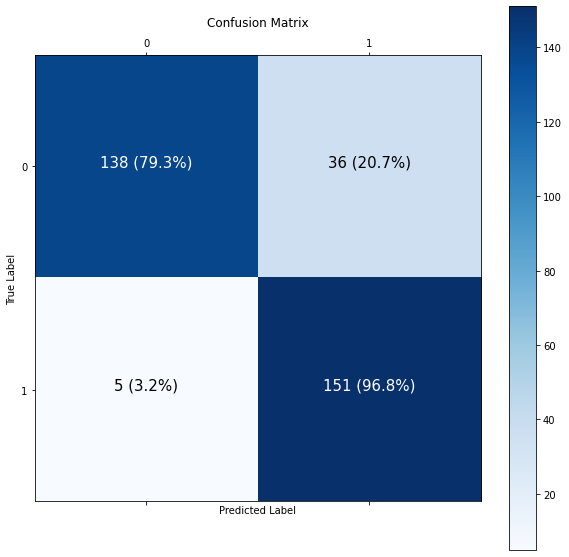

In [ ]:
import itertools

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")

threshold = (cm.max()+cm.min())/2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)